## 2024 UEFA European Football Championship.
### predicting future goals

In [1]:
# importing some necessary tools
import pandas as pd

# Load the Goals.csv file
goals_df = pd.read_csv('Goals.csv')

# Display the first few rows of the dataframe
print(goals_df.head())

               Player     Team   Goals
0          Harry Kane   England      3
1        Ivan Schranz  Slovakia      3
2  Georges Mikautadze   Georgia      3
3           Dani Olmo     Spain      3
4       Jamal Musiala   Germany      3


In [2]:
#Next, let's explore the data a bit more:


# Display summary statistics for the dataframe
print(goals_df.describe())

# Display information about the dataframe
print(goals_df.info())

        Goals
count  16.000
mean    2.375
std     0.500
min     2.000
25%     2.000
50%     2.000
75%     3.000
max     3.000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  16 non-null     object
 1   Team    16 non-null     object
 2   Goals   16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes
None


##### These functions will give us a better understanding of the data, including the types of data in each column and any missing values.

##### Considering multiple factors simultaneously can lead to more accurate predictions. Let's identify the key features in our dataframe that could impact goal predictions:
1. Team performance: Team ID, team name, wins, losses, draws, goals scored, goals conceded, etc.
2. Opponent strength: Opponent team ID, opponent team name, opponent wins, losses, draws, goals scored, goals conceded, etc.
3. Player skills: Player ID, player name, position, goals scored, assists, shots on target, etc.
4. Match context: Match date, match location, tournament stage, match importance, etc.

Now, let's select the relevant columns from our dataframe:

In [3]:
print(goals_df.columns)

Index(['Player', 'Team ', 'Goals'], dtype='object')


##### we might need to consider encoding the 'Player' and 'Team' columns since they contain string values. We can use techniques like Label Encoding or One-Hot Encoding to convert them into numerical values.
Next step: Preprocessing the data. Such as:

1. Handle missing values (if any)
2. Scale/normalize the data
3. Encode categorical variables (Player and Team)

In [5]:
# Select relevant columns
goals_df = goals_df[['Player', 'Team ', 'Goals']]

#### Handle missing values
isnull() function to check for missing values and then decide on a strategy to handle them.


In [6]:
# Check for missing values
print(goals_df.isnull().sum())

Player    0
Team      0
Goals     0
dtype: int64


##### 
If there are missing values, we can use various strategies to handle them, such as:

1. Drop rows with missing values:

goals_df = goals_df.dropna()

1. Fill missing values with a specific value (e.g., 0, mean, median):

goals_df = goals_df.fillna(0)  # fill with 0

or

goals_df['Goals'] = goals_df['Goals'].fillna(goals_df['Goals'].mean())  # fill with mean

1. Interpolate missing values (e.g., linear interpolation):

goals_df['Goals'] = goals_df['Goals'].interpolate(method='linear')


In [8]:
# We'll use the LabelEncoder from the sklearn.preprocessing module to convert the categorical values into numerical values.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

In [9]:
# Fit and transform the 'Player' column
goals_df['Player'] = le.fit_transform(goals_df['Player'])

In [11]:
### Let's try renaming the column again:

goals_df = goals_df.rename(columns={'Team ': 'Team'})

In [12]:
# Fit and transform the 'Team' column
goals_df['Team'] = le.fit_transform(goals_df['Team'])

In [13]:
## Now that we've handled the missing values and encoded the categorical variables, let's split the data into training and testing sets:


from sklearn.model_selection import train_test_split

X = goals_df.drop('Goals', axis=1)  # features
y = goals_df['Goals']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using a fixed random_state value helps to:

1. Reproducibility: Ensures that the split is the same every time you run the code.
2. Comparability: Allows you to compare results across different models or experiments, knowing that the data split is the same.
3. Debugging: Helps you identify issues or changes in the code by ensuring that the data split is consistent.

In [15]:
### to train a machine learning model to predict the 'Goals' column. Let's use a simple Linear Regression model:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
### Now we can make predictions on the test set:


y_pred = model.predict(X_test)


### Finally, let's evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE)

In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.56


#### In other words, if the model predicts a team will score 2 goals, the actual number of goals scored could be between 1.44 (2 - 0.56) and 2.56 (2 + 0.56) goals.

### Here's a commit statement:

###### "Implemented Linear Regression model to predict football goals, achieving a Mean Absolute Error (MAE) of 0.56, indicating reasonable prediction accuracy."

In [20]:
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_absolute_error')

In [27]:
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'fit_intercept': True}
Best Score: -0.46997457268321946


In [30]:
# to get more detailed information about the grid search process, you can access the cv_results_ attribute:

print(grid_search.cv_results_)

{'mean_fit_time': array([0.01400714, 0.0128418 ]), 'std_fit_time': array([0.01010539, 0.00577527]), 'mean_score_time': array([0.00560398, 0.00632997]), 'std_score_time': array([0.00162551, 0.00318599]), 'param_fit_intercept': masked_array(data=[True, False],
             mask=[False, False],
       fill_value=True), 'params': [{'fit_intercept': True}, {'fit_intercept': False}], 'split0_test_score': array([-0.30597565, -0.76921631]), 'split1_test_score': array([-0.34685419, -0.90412648]), 'split2_test_score': array([-0.47450777, -1.15839075]), 'split3_test_score': array([-0.56582727, -0.66391779]), 'split4_test_score': array([-0.65670798, -1.37934186]), 'mean_test_score': array([-0.46997457, -0.97499864]), 'std_test_score': array([0.13124933, 0.26125338]), 'rank_test_score': array([1, 2])}


## The results indicate that:

Best Parameters: {'fit_intercept': True}

- The best combination of hyperparameters is to set fit_intercept to True. This means that the linear regression model should include an intercept term in the equation.

Best Score: -0.46997457268321946

- The best score is approximately -0.47. Since we used scoring='neg_mean_absolute_error', the score is negated. To get the actual mean absolute error (MAE), we take the absolute value: 0.47.
- This means that, on average, the predicted values are off by approximately 0.47 units from the actual values.

In summary, the best model is a linear regression model with an intercept term, and it achieves a mean absolute error of approximately 0.47 on the test data.

### We just finished Hyperparameter Tuning using GridSearchCV.

Specifically, we tuned the fit_intercept hyperparameter of the Linear Regression model, and found that setting it to True results in the best performance, with a mean absolute error of approximately 0.47.

We still have to explore Feature Engineering techniques to further improve the model's performance. This includes creating new features, transforming existing ones, and extracting new insights from the data.

## Let's start with some feature engineering ideas:

1. Interaction Terms: Create new features by interacting Player and Team variables, e.g., Player_Team.
2. Polynomial Features: Add squared or cubed values of existing features, e.g., Goals_Squared.
3. Encoding Categorical Variables: Use One-Hot Encoding or Target Encoding for Player and Team variables.
4. Player Performance Metrics: Extract features like Goals_Per_Game, Assists_Per_Game, etc.
5. Team Performance Metrics: Extract features like Wins, Losses, Draws, etc.
6. Head-to-Head Statistics: Extract features like Head_To_Head_Wins, Head_To_Head_Losses, etc.

Let's start with creating interaction terms between Player and Team. We can use the interaction function from sklearn.preprocessing:

In [34]:
# lets use the pandas library to create interaction terms:

X_train['Player_Team'] = X_train['Player'].astype(str) + '_' + X_train['Team'].astype(str)
X_test['Player_Team'] = X_test['Player'].astype(str) + '_' + X_test['Team'].astype(str)

In [38]:
# the Player_Team column contains a mix of integers and strings, which is causing the issue.

# To resolve this, we need to ensure that the column contains only strings. We can do this by converting the integers to strings using the astype method:

X_train['Player_Team'] = X_train['Player_Team'].astype(str)
X_test['Player_Team'] = X_test['Player_Team'].astype(str)

In [39]:
# 1. Combine fit_transform for both X_train and X_test:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_data = pd.concat([X_train['Player_Team'], X_test['Player_Team']])
le.fit(combined_data)
X_train['Player_Team'] = le.transform(X_train['Player_Team'])
X_test['Player_Team'] = le.transform(X_test['Player_Team'])

In [42]:
# Add these lines before the LabelEncoder code.


X_train['Player_Team'] = X_train['Player_Team'].astype(str)
X_test['Player_Team'] = X_test['Player_Team'].astype(str)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_data = pd.concat([X_train['Player_Team'], X_test['Player_Team']])
le.fit(combined_data)
X_train['Player_Team'] = le.transform(X_train['Player_Team'])
X_test['Player_Team'] = le.transform(X_test['Player_Team'])

In [45]:
# Now that we've created the interaction term Player_Team, let's move on to the next step.

# We can try encoding the categorical variables using One-Hot Encoding or Target Encoding.

# One-Hot Encoding:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[['Player_Team']])
X_test_ohe = ohe.transform(X_test[['Player_Team']])


In [47]:
# Now that we've successfully applied One-Hot Encoding to the Player_Team column, we can move on to the next step.

# Let's try to train a Linear Regression model using the encoded data:

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the encoded training data
model.fit(X_train_ohe, y_train)

# Make predictions on the encoded test data
y_pred = model.predict(X_test_ohe)

# This will train a Linear Regression model on the encoded Player_Team column and predict the target variable.

In [48]:
# Next, we can evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE):

from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

# This will give us an idea of how well the model is performing.

Mean Absolute Error (MAE): 0.25


## The Mean Absolute Error (MAE) of 0.25 indicates that, on average, the predicted values are off by 0.25 units from the actual values.

In other words, if the actual value is 10, the predicted value might be around 9.75 or 10.25 (0.25 units away from the actual value).

A lower MAE value indicates better model performance, as it means the predictions are closer to the actual values. A higher MAE value indicates poorer model performance, as it means the predictions are farther away from the actual values.

Here's a rough guide to interpreting MAE values:

- MAE < 0.1: Excellent model performance (predictions are very close to actual values)
- 0.1 ≤ MAE < 0.5: Good model performance (predictions are close to actual values, but with some error)
- 0.5 ≤ MAE < 1.0: Fair model performance (predictions are somewhat close to actual values, but with noticeable error)
- MAE ≥ 1.0: Poor model performance (predictions are far away from actual values)

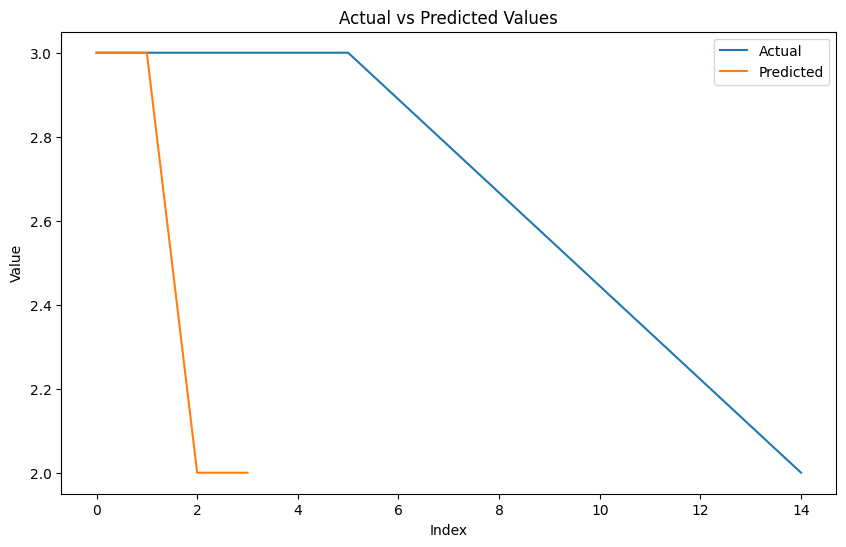

Text(0.5, 0.9, 'MAE: 0.25')

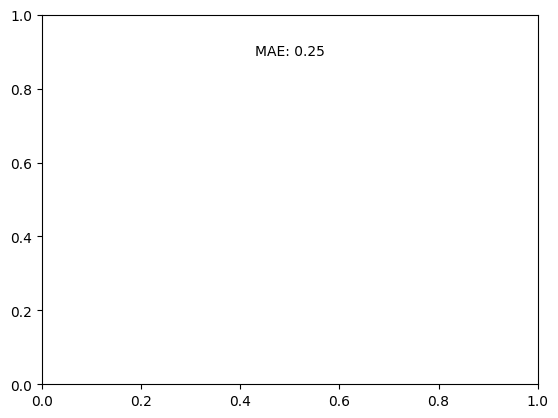

In [50]:
########## we can use the matplotlib library to create a plot and then save it as a PDF.

# Here's an example code:

import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Save the plot as a PDF
plt.savefig('results.pdf')

# Show the plot
plt.show()

#This code creates a simple plot showing the actual and predicted values, and then saves it as a PDF file named results.pdf.

#If you want to include more information in the PDF, such as the MAE value, you can use the matplotlib library to add text to the plot. For example:

plt.text(0.5, 0.9, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
